In [108]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [109]:
import pandas as pd

df_temp=pd.read_csv('gdrive/MyDrive/Data/GlobalLandTemperaturesByCountry.csv') #Temperature df
df_co2=pd.read_csv('gdrive/MyDrive/Data/CO2emissionbycountries.csv',encoding= 'unicode_escape') #CO2 df
df_pop=pd.read_csv('gdrive/MyDrive/Data/Population.csv') #Population df

In [110]:
df_temp.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [111]:
pd.DataFrame(df_temp)


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [112]:
df_co2.head(5)

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/km²
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/km²
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/km²
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/km²
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/km²


In [113]:
#Dropping data with CO2 emission equal 0
df= df_co2[df_co2['CO2 emission (Tons)'] != 0]

In [114]:
print(df)

           Country Code Calling Code  Year  CO2 emission (Tons)  \
199    Afghanistan   AF           93  1949              14656.0   
200    Afghanistan   AF           93  1950              98928.0   
201    Afghanistan   AF           93  1951             190528.0   
202    Afghanistan   AF           93  1952             282128.0   
203    Afghanistan   AF           93  1953             388384.0   
...            ...  ...          ...   ...                  ...   
59615     Zimbabwe   ZW          263  2016          736467042.0   
59616     Zimbabwe   ZW          263  2017          746048675.0   
59617     Zimbabwe   ZW          263  2018          757903042.0   
59618     Zimbabwe   ZW          263  2019          768852126.0   
59619     Zimbabwe   ZW          263  2020          779383468.0   

       Population(2022)      Area % of World Density(km2)  
199          41128771.0  652230.0      0.40%       63/km²  
200          41128771.0  652230.0      0.40%       63/km²  
201          41

In [115]:
#Preparing data by dropping duplicates to visualize in which years surveys start.
df_single=df
df_single=df_single.drop_duplicates(subset=['Country'])
print(df_single)

                 Country Code Calling Code  Year  CO2 emission (Tons)  \
199          Afghanistan   AF           93  1949              14656.0   
454              Albania   AL          355  1933               7328.0   
708              Algeria   DZ          213  1916               3664.0   
1053             Andorra   AD          376  1990             406704.0   
1284              Angola   AO          244  1950             186864.0   
...                  ...  ...          ...   ...                  ...   
58407            Vietnam   VN           84  1892             212512.0   
58787  Wallis and Futuna   WF          681  2001              14656.0   
59007              Yemen   YE          967  1950              58624.0   
59278             Zambia   ZM          260  1950            2330187.0   
59502           Zimbabwe   ZW          263  1903             113584.0   

       Population(2022)       Area % of World Density(km2)  
199          41128771.0   652230.0      0.40%       63/km²  
4

In [116]:
#Filtering country with data surveys starting from 1959
df_single = df_single[df_single['Year'] > 1959]
print(df_single)

                        Country Code Calling Code  Year  CO2 emission (Tons)  \
1053                    Andorra   AD          376  1990             406704.0   
1595                   Anguilla   AI        1-264  1990              51296.0   
1863                 Antarctica   AQ          672  1987               3664.0   
6453                     Bhutan   BT          975  1970               3664.0   
7268                   Botswana   BW          267  1972              21984.0   
11060          Christmas Island   CX           61  1970              69616.0   
12143              Cook Islands   CK          682  1969              10992.0   
27582                  Kiribati   KI          686  1961               7328.0   
27900                    Kosovo   XK          383  2008            7386624.0   
29508                   Lesotho   LS          266  1990            1472928.0   
30321             Liechtenstein   LI          423  1990             198968.0   
32199                  Maldives   MV    

In [117]:
#Left outer join exclusion on country with data surveys starting from 1959
df_final=pd.merge(df,df_single[['Country']],on=['Country'],how="outer",indicator=True)
df_final=df_final[df_final['_merge']=='left_only']
# resetting the DataFrame index
df_final = df_final.reset_index()

In [119]:
df_new=df_final[df_final['Year'] >= 1959]

df_new = df_new.reset_index()

In [192]:
df_new

,Country,Code,Year,CO2 emission (Tons),Density(km2)
0,Afghanistan,AF,1959,1839179.0,63/km²
1,Afghanistan,AF,1960,2253064.0,63/km²
2,Afghanistan,AF,1961,2743862.0,63/km²
3,Afghanistan,AF,1962,3432456.0,63/km²
4,Afghanistan,AF,1963,4139192.0,63/km²
...,...,...,...,...,...
11837,Zimbabwe,ZW,2016,736467042.0,42/km²
11838,Zimbabwe,ZW,2017,746048675.0,42/km²
11839,Zimbabwe,ZW,2018,757903042.0,42/km²
11840,Zimbabwe,ZW,2019,768852126.0,42/km²


In [ ]:
df_final.info(verbose=True)

In [123]:
df_new=df_new.drop(columns=['index','level_0','Calling Code','_merge','Area','Population(2022)','% of World'])

In [ ]:
df_new.info(verbose=True)

In [ ]:

check_nan =df_new['Density(km2)'].isnull()
print(check_nan)
df_new.loc[df_new['Density(km2)'].isnull()]

# printing the result

In [ ]:
df_pop = pd.read_csv('gdrive/MyDrive/Data/population2.csv') #Population df
df_pop

In [ ]:
df_pop = pd.read_csv('gdrive/MyDrive/Data/population2.csv') #Population df

df_pop = df_pop.drop(columns=['field/0/_name','field/0/_key','field/1/_name','field/1/_key','field/1/__text','field/2/_name','field/3/_name'])
df_pop = df_pop.rename(columns={"field/0/__text": "Country", "field/2/__text": "Year", 'field/3/__text': 'Population'})
df_pop.info(verbose=True)

check_nan =df_pop['Population'].isnull()
print(check_nan)
df_pop.loc[df_pop['Population'].isnull()]

In [144]:
print(len(df_pop))

df_pc = df_pop.Country.isin(df_new.Country).astype(int)
d=df_pc.array
df_del=[]
count=0
for i in range(len(d)):
  if d[i]==0:
    df_del.append(df_pop['Country'].loc[i])
print(df_del)
df_delN = list(dict.fromkeys(df_del))
print(df_delN)
#for row in df_pc.rows:
#    if df_pc==0:
#      print(df_pc[row])

16492
['Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', 'Africa Eastern and Southern', '

In [ ]:
df_pop


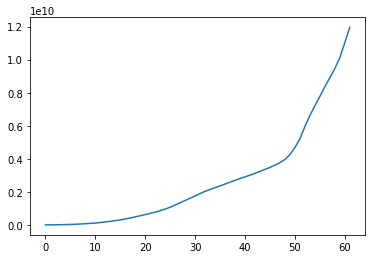

In [259]:
# Import math Library
import math
p=[]

p.append(df_new['CO2 emission (Tons)'].loc[df_new['Country'] == 'Afghanistan'])

px=np.array(p)
p0=px[0]
len(p0)
xold=list(range(0, 62))
X=np.array(xold)

p1 = p0
Amplitude=4
Period=2.3
Phase=2
Y=[]
for i in range(0,62):
  Y.append(p0[i] + p1[i]*X[i] + Amplitude*math.sin(2*math.pi*(X[i]-Phase)/Period))

xpoints = np.array(X)
ypoints = np.array(Y)
plt.plot(xpoints, ypoints)
from matplotlib.pyplot import figure

plt.show()

In [258]:
a = [15, 12, 8, 8, 7, 7, 7, 6, 5, 3]
b = [10, 25, 17, 11, 13, 17, 20, 13, 9, 15]
from scipy.stats import linregress
linregress(a, b)

LinregressResult(slope=0.20833333333333331, intercept=13.375, rvalue=0.14499815458068518, pvalue=0.689401448116695, stderr=0.5026170462708364, intercept_stderr=4.247039688703678)

In [229]:
p=[]

p.append(df_new['CO2 emission (Tons)'].loc[df_new['Country'] == 'Afghanistan'])

px=np.array(p)
p0=px[0]
len(p0)

62

In [236]:
xold=list(range(1, 62))
X=np.array(xold)
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61])